In [1]:
import os, cv, math
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.utils import plot_model
import numpy as np
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from shutil import copyfile
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import Augmentor
import cv2
from PIL import Image
import numpy as np
%matplotlib inline

Using TensorFlow backend.
C:\Users\91876\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\91876\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\91876\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\91876\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [20]:
dataset_path = 'asl_dataset'
dataset_list = os.listdir(dataset_path)
print(dataset_list)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [9]:
training_path = dataset_path
for i in dataset_list:
    p = Augmentor.Pipeline(os.path.join(training_path, i))
    p.zoom(probability=0.5, min_factor=1.1, max_factor=1.3)
    p.sample(100)

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF14B00>:   5%|▌         | 5/100 [00:00<00:13,  7.11 Samples/s]                  

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\0\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF2BE80>: 100%|██████████| 100/100 [00:00<00:00, 239.18 Samples/s]                
Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF3A9E8>:   3%|▎         | 3/100 [00:00<00:10,  8.83 Samples/s]

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\1\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF726D8>: 100%|██████████| 100/100 [00:00<00:00, 275.69 Samples/s]                
Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF491D0>:   5%|▌         | 5/100 [00:00<00:11,  8.43 Samples/s]                  

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\2\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF63320>: 100%|██████████| 100/100 [00:00<00:00, 268.09 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF5A940>:   5%|▌         | 5/100 [00:00<00:10,  9.46 Samples/s]

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\3\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF53160>: 100%|██████████| 100/100 [00:00<00:00, 237.25 Samples/s]                
Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF72278>:   2%|▏         | 2/100 [00:00<00:12,  8.04 Samples/s]

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\4\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF729B0>: 100%|██████████| 100/100 [00:00<00:00, 221.71 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF25C18>:   4%|▍         | 4/100 [00:00<00:12,  7.54 Samples/s]

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\5\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF72E80>: 100%|██████████| 100/100 [00:00<00:00, 213.79 Samples/s]                
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF2BC50>:   5%|▌         | 5/100 [00:00<00:13,  7.14 Samples/s]

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\6\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700ADCADA0>: 100%|██████████| 100/100 [00:00<00:00, 203.80 Samples/s]                
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF00F60>:   6%|▌         | 6/100 [00:00<00:11,  7.96 Samples/s]

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\7\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF2B208>: 100%|██████████| 100/100 [00:00<00:00, 258.56 Samples/s]                
Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF5AC18>:   6%|▌         | 6/100 [00:00<00:10,  8.88 Samples/s]                  

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\8\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF35AC8>: 100%|██████████| 100/100 [00:00<00:00, 271.76 Samples/s]                
Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF53438>:   3%|▎         | 3/100 [00:00<00:12,  7.89 Samples/s]                  

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\9\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF6ED68>: 100%|██████████| 100/100 [00:00<00:00, 267.38 Samples/s]                
Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF72D68>:   1%|          | 1/100 [00:00<00:13,  7.27 Samples/s]

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\a\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF72A90>: 100%|██████████| 100/100 [00:00<00:00, 247.46 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF49C50>:   8%|▊         | 8/100 [00:00<00:10,  8.80 Samples/s]

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\b\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF4B390>: 100%|██████████| 100/100 [00:00<00:00, 275.44 Samples/s]                
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF14CC0>:   2%|▏         | 2/100 [00:00<00:14,  6.96 Samples/s]

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\c\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF14CC0>: 100%|██████████| 100/100 [00:00<00:00, 209.97 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF3A2E8>:   1%|          | 1/100 [00:00<00:17,  5.76 Samples/s]

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\d\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF71D68>: 100%|██████████| 100/100 [00:00<00:00, 186.59 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF00438>:   1%|          | 1/100 [00:00<00:15,  6.57 Samples/s]

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\e\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF1DE48>: 100%|██████████| 100/100 [00:00<00:00, 208.86 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF49A58>:   1%|          | 1/100 [00:00<00:17,  5.80 Samples/s]

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\f\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF89BE0>: 100%|██████████| 100/100 [00:00<00:00, 205.04 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF72E80>:   6%|▌         | 6/100 [00:00<00:09,  9.64 Samples/s]

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\g\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF72358>: 100%|██████████| 100/100 [00:00<00:00, 268.84 Samples/s]                
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF25B38>:   7%|▋         | 7/100 [00:00<00:09,  9.83 Samples/s]

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\h\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF00B70>: 100%|██████████| 100/100 [00:00<00:00, 247.57 Samples/s]                
Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF49860>:   7%|▋         | 7/100 [00:00<00:05, 18.07 Samples/s]                  

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\i\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF5A7B8>: 100%|██████████| 100/100 [00:00<00:00, 273.90 Samples/s]                
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF53400>:   2%|▏         | 2/100 [00:00<00:14,  6.87 Samples/s]

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\j\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF7A5F8>: 100%|██████████| 100/100 [00:00<00:00, 226.85 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF00A58>:   4%|▍         | 4/100 [00:00<00:11,  8.05 Samples/s]                  

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\k\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700ADCA3C8>: 100%|██████████| 100/100 [00:00<00:00, 211.98 Samples/s]                
Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF14828>:   1%|          | 1/100 [00:00<00:12,  7.65 Samples/s]                  

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\l\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF72D30>: 100%|██████████| 100/100 [00:00<00:00, 250.67 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF62CC0>:   2%|▏         | 2/100 [00:00<00:13,  7.21 Samples/s]                  

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\m\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF3A518>: 100%|██████████| 100/100 [00:00<00:00, 222.82 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF00B38>:   3%|▎         | 3/100 [00:00<00:13,  7.43 Samples/s]

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\n\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF72390>: 100%|██████████| 100/100 [00:00<00:00, 204.63 Samples/s]                
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x1700AF728D0>:  14%|█▍        | 14/100 [00:00<00:02, 35.97 Samples/s]

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\nothing\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x1700AF00550>: 100%|██████████| 100/100 [00:00<00:00, 352.53 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF72748>:   5%|▌         | 5/100 [00:00<00:12,  7.57 Samples/s]

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\o\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF559B0>: 100%|██████████| 100/100 [00:00<00:00, 218.91 Samples/s]                
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF14630>:   5%|▌         | 5/100 [00:00<00:10,  8.95 Samples/s]

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\p\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF53F60>: 100%|██████████| 100/100 [00:00<00:00, 230.66 Samples/s]                
Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF2B198>:   1%|          | 1/100 [00:00<00:13,  7.54 Samples/s]

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\q\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF3F0B8>: 100%|██████████| 100/100 [00:00<00:00, 207.72 Samples/s]                
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF5AE10>:   6%|▌         | 6/100 [00:00<00:04, 19.10 Samples/s]

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\r\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF555C0>: 100%|██████████| 100/100 [00:00<00:00, 256.40 Samples/s]                
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF004A8>:   3%|▎         | 3/100 [00:00<00:11,  8.72 Samples/s]

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\s\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF00DD8>: 100%|██████████| 100/100 [00:00<00:00, 244.54 Samples/s]                
Processing <PIL.Image.Image image mode=RGB size=200x200 at 0x1700AF14B00>:  30%|███       | 30/100 [00:00<00:01, 55.70 Samples/s]                  

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\space\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x1700AF72780>: 100%|██████████| 100/100 [00:00<00:00, 385.63 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF53320>:   6%|▌         | 6/100 [00:00<00:11,  8.29 Samples/s]

Initialised with 65 image(s) found.
Output directory set to asl_dataset_new\t\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF2B780>: 100%|██████████| 100/100 [00:00<00:00, 236.14 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF49CC0>:   3%|▎         | 3/100 [00:00<00:11,  8.15 Samples/s]

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\u\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF13BA8>: 100%|██████████| 100/100 [00:00<00:00, 219.87 Samples/s]                
Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF145F8>:   4%|▍         | 4/100 [00:00<00:11,  8.57 Samples/s]                  

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\v\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF00B38>: 100%|██████████| 100/100 [00:00<00:00, 240.71 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF5AA58>:   6%|▌         | 6/100 [00:00<00:11,  8.15 Samples/s]                  

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\w\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF28128>: 100%|██████████| 100/100 [00:00<00:00, 242.83 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF72780>:   1%|          | 1/100 [00:00<00:16,  6.11 Samples/s]

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\x\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF62C88>: 100%|██████████| 100/100 [00:00<00:00, 167.67 Samples/s]                
Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF3A438>:   1%|          | 1/100 [00:00<00:18,  5.39 Samples/s]

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\y\output.

Processing <PIL.Image.Image image mode=RGB size=400x400 at 0x1700AF6EF28>: 100%|██████████| 100/100 [00:00<00:00, 174.06 Samples/s]                
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF53BE0>:   6%|▌         | 6/100 [00:00<00:12,  7.71 Samples/s]

Initialised with 70 image(s) found.
Output directory set to asl_dataset_new\z\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x1700AF76940>: 100%|██████████| 100/100 [00:00<00:00, 216.23 Samples/s]


In [21]:
train_set = {}
validation_set = {}
test_set = {}

for cat in dataset_list:
    cat_dir = os.path.join(dataset_path, cat)
    cat_files = os.listdir(cat_dir)
    train_list, test_list = train_test_split(cat_files, test_size=0.3)
    validation_list, test_list = train_test_split(test_list, test_size=0.5)
    
    train_set[cat] = train_list
    test_set[cat] = test_list
    validation_set[cat] = validation_list

In [22]:
for cat in tqdm(train_set.keys()):
    cat_dir = os.path.join(dataset_path, 'training_set', 'class_' + str(cat))
    os.makedirs(cat_dir)
    for file in train_set[cat]:
        image = cv2.imread(os.path.join(dataset_path, cat, file))
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (3, 3), 0)
        src = cv2.Canny(blurred, 10, 100)
        dest = os.path.join(cat_dir, file)
        im = Image.fromarray(src)
        im.save(dest)

100%|██████████| 39/39 [00:34<00:00,  1.14it/s]


In [23]:
for cat in tqdm(validation_set.keys()):
    cat_dir = os.path.join(dataset_path, 'validation_set', 'class_' + str(cat))
    os.makedirs(cat_dir)
    for file in validation_set[cat]:
        image = cv2.imread(os.path.join(dataset_path, cat, file))
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (3, 3), 0)
        src = cv2.Canny(blurred, 10, 100)
        dest = os.path.join(cat_dir, file)
        im = Image.fromarray(src)
        im.save(dest)

100%|██████████| 39/39 [00:07<00:00,  5.17it/s]


In [24]:
for cat in tqdm(test_set.keys()):
    cat_dir = os.path.join(dataset_path, 'test_set', 'class_' + str(cat))
    os.makedirs(cat_dir)
    for file in test_set[cat]:
        image = cv2.imread(os.path.join(dataset_path, cat, file))
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (3, 3), 0)
        src = cv2.Canny(blurred, 10, 100)
        dest = os.path.join(cat_dir, file)
        im = Image.fromarray(src)
        im.save(dest)

100%|██████████| 39/39 [00:07<00:00,  5.05it/s]


In [25]:
for i in train_set.keys():
    print(i+ "- Training size: "+ str(len(train_set[i]))+ " Validation set: "+ str(len(validation_set[i]))+ " Test set: "+ str(len(test_set[i])))

0- Training size: 143 Validation set: 31 Test set: 31
1- Training size: 144 Validation set: 31 Test set: 31
2- Training size: 144 Validation set: 31 Test set: 31
3- Training size: 144 Validation set: 31 Test set: 31
4- Training size: 144 Validation set: 31 Test set: 32
5- Training size: 144 Validation set: 31 Test set: 32
6- Training size: 144 Validation set: 31 Test set: 32
7- Training size: 144 Validation set: 31 Test set: 31
8- Training size: 145 Validation set: 31 Test set: 32
9- Training size: 142 Validation set: 31 Test set: 31
A- Training size: 210 Validation set: 45 Test set: 45
B- Training size: 210 Validation set: 45 Test set: 45
C- Training size: 210 Validation set: 45 Test set: 45
D- Training size: 210 Validation set: 45 Test set: 45
del- Training size: 210 Validation set: 45 Test set: 45
E- Training size: 210 Validation set: 45 Test set: 45
F- Training size: 210 Validation set: 45 Test set: 45
G- Training size: 210 Validation set: 45 Test set: 45
H- Training size: 210 Vali

In [26]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

training_data = train_datagen.flow_from_directory(os.path.join(dataset_path, 'training_set'),
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_data = validation_datagen.flow_from_directory(os.path.join(dataset_path, 'validation_set'),
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(os.path.join(dataset_path, 'test_set'),
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 7528 images belonging to 39 classes.
Found 1615 images belonging to 39 classes.
Found 1619 images belonging to 39 classes.


In [27]:
classifier = Sequential()

classifier.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation= 'relu'))
BatchNormalization()
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(32, (3,3), activation = 'relu'))
BatchNormalization()
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.25))

classifier.add(Conv2D(32, (3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.25))

classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 39, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [28]:
history = classifier.fit_generator(training_data,
                                  steps_per_epoch= math.ceil(training_data.n/training_data.batch_size),
                                  epochs=30,
                                  validation_data= validation_data,
                                  validation_steps= math.ceil(validation_data.n/validation_data.batch_size))

Epoch 1/30
236/236 [==============================] - 88s 373ms/step - loss: 3.0610 - acc: 0.1433 - val_loss: 2.4932 - val_acc: 0.2743
Epoch 2/30
236/236 [==============================] - 44s 186ms/step - loss: 2.3378 - acc: 0.3195 - val_loss: 1.8432 - val_acc: 0.4396
Epoch 3/30
236/236 [==============================] - 44s 187ms/step - loss: 1.8450 - acc: 0.4452 - val_loss: 1.5681 - val_acc: 0.5238
Epoch 4/30
236/236 [==============================] - 45s 192ms/step - loss: 1.5596 - acc: 0.5226 - val_loss: 1.4425 - val_acc: 0.5616
Epoch 5/30
236/236 [==============================] - 51s 215ms/step - loss: 1.3910 - acc: 0.5681 - val_loss: 1.1839 - val_acc: 0.6241
Epoch 6/30
236/236 [==============================] - 49s 208ms/step - loss: 1.2487 - acc: 0.6087 - val_loss: 1.0971 - val_acc: 0.6551
Epoch 7/30
236/236 [==============================] - 47s 200ms/step - loss: 1.1203 - acc: 0.6507 - val_loss: 1.0453 - val_acc: 0.6749
Epoch 8/30
236/236 [==============================] - 4

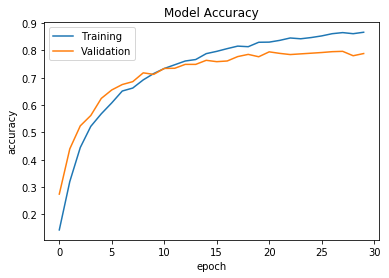

In [29]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'])


In [12]:
test_loss, test_accuracy = classifier.evaluate_generator(test_data, math.ceil(test_data.n / test_data.batch_size))
print("Accuracy on test set : {}".format(test_accuracy))

Accuracy on test set : 0.9197035205077064


In [13]:
validation_loss, validation_accuracy = classifier.evaluate_generator(validation_data, math.ceil(validation_data.n / validation_data.batch_size))
print("Accuracy on validation set: {}".format(validation_accuracy))

Accuracy on validation set: 0.9337461300309597


In [43]:
import tensorflow as tf

In [31]:
classifier_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(classifier_json)

classifier.save_weights("model.h5")
print("Model saved to disk")

Model saved to disk


In [32]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("model.h5")
print('Loaded model from disk')

Loaded model from disk


In [4]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 32)        9248      
__________

In [34]:
loaded_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [41]:
import numpy as np
from keras.preprocessing.image import img_to_array
cat_dir = "Images"
cat_files = os.listdir(cat_dir)

for file in cat_files:
    image = cv2.imread(os.path.join(cat_dir, file))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    src = cv2.Canny(blurred, 10, 150)
    dest = os.path.join(cat_dir, file)
    im = Image.fromarray(src)
    im.save(dest)
    


HO6 ABOGYO7


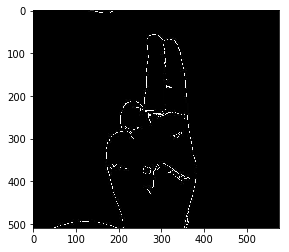

In [44]:
cat_dir = "Testttt"
cat_files = os.listdir(cat_dir)
sentence = ''
for i in cat_files:
    img = cv2.imread(os.path.join(cat_dir, i))
    plt.imshow(img)
    dims = (64,64)
    img1 = cv2.resize(img, dims, interpolation=cv2.INTER_AREA)
    
    image = img1/255
    test_image = np.expand_dims(image, axis = 0)
    
    result = loaded_model.predict(test_image)
#   print(result)
    labels = np.argmax(result, axis=-1)  
    if labels[0] == 0:
        sentence += '0'
    elif labels[0] == 1:
        sentence += '1'
    elif labels[0] == 2:
        sentence += '2'
    elif labels[0] == 3:
        sentence += '3'
    elif labels[0] == 4:
        sentence += '4'
    elif labels[0] == 5:
        sentence += '5'
    elif labels[0] == 6:
        sentence += '6'
    elif labels[0] == 7:
        sentence += '7'
    elif labels[0] == 8:
        sentence += '8'
    elif labels[0] == 9:
        sentence += '9'
    elif labels[0] == 10:
        sentence += 'A'
    elif labels[0] == 11:
        sentence += 'B'
    elif labels[0] == 12:
        sentence += 'C'
    elif labels[0] == 13:
        sentence += 'D'
    elif labels[0] == 36:
        sentence = sentence[:-1]
    elif labels[0] == 14:
        sentence += 'E'
    elif labels[0] == 15:
        sentence += 'F'
    elif labels[0] == 16:
        sentence += 'G'
    elif labels[0] == 17:
        sentence += 'H'
    elif labels[0] == 18:
        sentence += 'I'
    elif labels[0] == 19:
        sentence += 'J'
    elif labels[0] == 20:
        sentence += 'K'
    elif labels[0] == 21:
        sentence += 'L'
    elif labels[0] == 22:
        sentence += 'M'
    elif labels[0] == 23:
        sentence += 'N'
    elif labels[0] == 37:
        sentence += ''
    elif labels[0] == 24:
        sentence += 'O'
    elif labels[0] == 25:
        sentence += 'P'
    elif labels[0] == 26:
        sentence += 'Q'
    elif labels[0] == 27:
        sentence += 'R'
    elif labels[0] == 28:
        sentence += 'S'
    elif labels[0] == 38:
        sentence += ' '
    elif labels[0] == 29:
        sentence += 'T'
    elif labels[0] == 30:
        sentence += 'U'
    elif labels[0] == 31:
        sentence += 'V'
    elif labels[0] == 32:
        sentence += 'W'
    elif labels[0] == 33:
        sentence += 'X'
    elif labels[0] == 34:
        sentence += 'Y'
    elif labels[0] == 35:
        sentence += 'Z'

print(sentence)

In [8]:
print("Enter:")
print("1 for English")
print("2 for Kannada")
print("3 for Hindi")
print("4 for Telugu")
lang = input()

Enter:
1 for English
2 for Kannada
3 for Hindi
4 for Telugu
1


In [9]:
if lang == '1':
    language = 'en'
elif lang == '2':
    language = 'kn'
elif lang == '3':
    language = 'hi'
elif lang == '4':
    language = 'te'
else:
    print('Please enter a proper value')

In [14]:
!pip install google_trans_new

You should consider upgrading via the 'c:\users\91876\anaconda3\python.exe -m pip install --upgrade pip' command.


In [10]:
from google_trans_new import google_translator
translator = google_translator()
result = translator.translate(sentence.lower(), lang_tgt=language)

In [11]:
print(result)

yow axe 


In [12]:
from gtts import gTTS

In [13]:
output = gTTS(text=result, lang=language, slow=False, tld='com')
output.save('speech.mp3')

os.system("start speech.mp3")

0

In [1]:
import cv2

In [ ]:
key = cv2.waitKey(1)
webcam = cv2.VideoCapture(0)
i= 10
while True:
    check, frame = webcam.read()
    cv2.imshow("Capturing", frame)
    key = cv2.waitKey(1)
    x,y,w,h = 0,0,250,250
    cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),3)
    roi = frame[y:y+h, x:x+w]
    cv2.imshow("Capturing", frame)
    cv2.imwrite(filename='Images\\saved_img'+str(i)+'.jpg', img=roi)
    cv2.waitKey(3000)
    i += 1 
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
webcam.release()
cv2.destroyAllWindows()       